Raíces de los primeros 5 polinomios de Laguerre

In [341]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [342]:
#Funcion derivada central
def Derivative(f,x,h=1e-4):
  return (f(x+h)-f(x-h))/(2*h)

In [343]:
#Metodo Newton-Raphson
def GetNewtonMethod(f,xn,itmax=100,precision=1e-8):

  error = 1
  it = 0

  while (error > precision) and (it < itmax):
    try:
      xn1 = xn - f(xn)/Derivative(f,xn)
      error = np.abs(f(xn)/Derivative(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1
 # print(it,xn)
  if it == itmax:
    return False
  else:
    return xn

In [344]:
#Retorna lista con las raices de una funcion
def GetAllRoots(f, x, tolerancia = 5):

  Roots = np.array([])

  for i in x:

    root = GetNewtonMethod(f, i)

    if root != False:

      croot = np.round(root, tolerancia)

      if croot not in Roots:
        Roots = np.append(Roots,croot)

  Roots.sort()

  return Roots

In [345]:
x = sym.Symbol('x', Real = True)
def Laguerre_poly (x, n):
    return (sym.exp(x)/sym.factorial(n))*sym.diff(((sym.exp(-x))*(x**n)), x, n)

In [346]:
#primeros 5 polinomios de Laguerre
poly = []
for i in range(1,6):
    poly.append(Laguerre_poly(x, i))

In [347]:
#Soporte
X = np.linspace(-5, 15, 100)

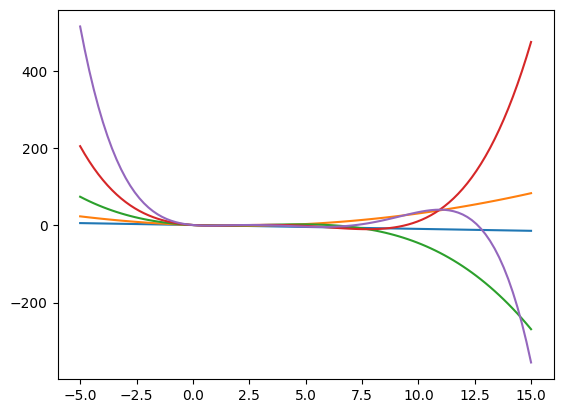

In [348]:
SoporteY = np.zeros_like(poly)
for i in range(len(poly)):
    Y = np.array([poly[i].subs(x, j) for j in X])
    SoporteY[i] = Y

    plt.plot(X, Y)
plt.show()

In [349]:
# RAICES POLINOMIOS
P1 = lambda y: float(poly[0].subs(x, y))
P2 = lambda y: float(poly[1].subs(x, y))
P3 = lambda y: float(poly[2].subs(x, y))
P4 = lambda y: float(poly[3].subs(x, y))
P5 = lambda y: float(poly[4].subs(x, y))

#polinomio 1
Roots1 = GetAllRoots(P1, X)

#polinomio 2
Roots2 = GetAllRoots(P2, X)

#polinomio 3
Roots3 = GetAllRoots(P3, X)

#polinomio 4
Roots4 = GetAllRoots(P4, X)

#polinomio 5
Roots5 = GetAllRoots(P5, X)

7: Aproximación de la función sin(x)

In [350]:
def Lagrange(x, X, i):
    L = 1
    for j in range(len(X)):
        if i != j:
            L *= (x-X[j])/(X[i]-X[j])
    return L

In [351]:
def interpolate(x, X, Y):
     
    poly = 0
    for i in range(len(X)):
        poly += Y[i]*Lagrange(x, X, i)
    return poly

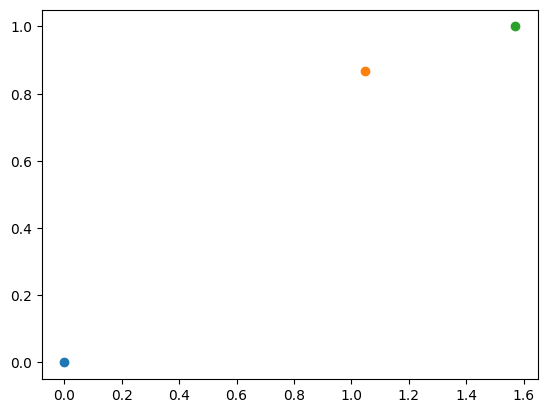

In [352]:
#SOPORTE
X = np.array([[0, np.sin(0)], [np.pi/3, np.sin(np.pi/3)], [np.pi/2, np.sin(np.pi/2)]])
for i in X:
    plt.scatter(i[0], i[1])
plt.show()

In [372]:
x = sym.Symbol('x', real = True)
X1 = np.array([i[0] for i in X])
Y1 = np.array([i[1] for i in X])
F = interpolate(x, X1, Y1)

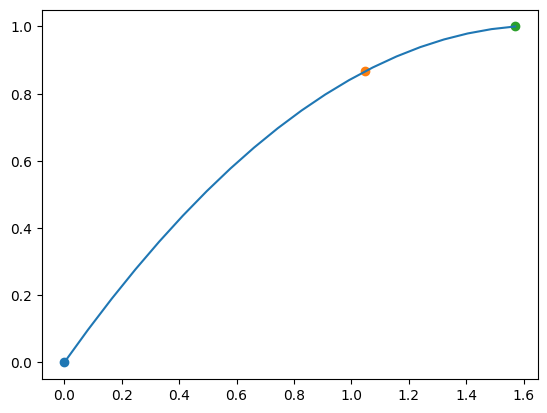

In [380]:
for i in X:
    plt.scatter(i[0], i[1])
plt.plot(np.linspace(0, np.pi/2, 20), [F.subs(x, i) for i in np.linspace(0, np.pi/2, 20)])
plt.show()

In [383]:
#Estime el valor de sin(π/8) usando el polinomio interpolador.
print(F.subs(x, np.pi/8))

true = np.sin(np.pi/8)
estimated = F.subs(x, np.pi/8)

#Error en la estimacion
e = np.abs(true - estimated)
print(e)

0.418208934443120
0.0355255020780303
